In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

df=pd.read_csv('C:\\Users\Ogeid99\Desktop\TABLE(declust).txt', sep= '\t', header=None) #copy a table from  matlab to text
df.columns=np.array(['Date', 'Magnitude' ,'MagnitudeType', 'DecimalYear', 'DayOfTheYear',
                            'X' ,'Y', 'Z', 'Longitude', 'Latitude', 'Depth'],dtype=object)
df

,Date,Magnitude,MagnitudeType,DecimalYear,DayOfTheYear,X,Y,Z,Longitude,Latitude,Depth
0,'16-Jan-2009 22:47:23',2.5,'ML',2009.043697,16,13.363,42.348,9.1,13.363,42.348,9.1
1,'18-Jan-2009 08:13:43',2.1,'ML',2009.047515,18,13.355,42.350,8.9,13.355,42.350,8.9
2,'18-Jan-2009 08:25:59',1.6,'ML',2009.047538,18,13.364,42.346,9.8,13.364,42.346,9.8
3,'23-Jan-2009 00:07:03',1.6,'ML',2009.060287,23,13.335,42.321,7.6,13.335,42.321,7.6
4,'23-Jan-2009 13:43:37',1.4,'ML',2009.061841,23,13.409,42.388,7.9,13.409,42.388,7.9
...,...,...,...,...,...,...,...,...,...,...,...
292,'18-Nov-2009 02:22:35',1.7,'ML',2009.879723,322,13.343,42.459,15.5,13.343,42.459,15.5
293,'18-Nov-2009 21:51:46',1.4,'ML',2009.881948,322,13.518,42.346,9.5,13.518,42.346,9.5
294,'20-Nov-2009 22:45:50',1.6,'ML',2009.887530,324,13.362,42.486,10.8,13.362,42.486,10.8
295,'21-Nov-2009 08:34:39',1.4,'ML',2009.888650,325,13.356,42.471,16.1,13.356,42.471,16.1


In [54]:
from datetime import datetime, timedelta
time=df['DecimalYear']
magnitude=df['Magnitude']
time_ploth_decimal_year=[]
#convert decimal year to datetime
'''for i in time:
    start = i
    year = int(i)
    rem = start - year
    base = datetime(year, 1, 1)
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    time_plot_decimal_year.append(result)'''
bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.2)))
number_of_earthquakes= pd.Series(np.array([np.count_nonzero((magnitude >= i ) & (magnitude <= i+0.2))
                                           for i in bin_magnitude]))
bin_magnitude=np.add(bin_magnitude,0.1)
#how many earthquakes per day
time_plot=df['Date']

function=lambda x: x.replace("'","") #replace "'" with ' '
datetime_object = lambda x: datetime.strptime(x, '%d-%b-%Y %H:%M:%S')
time_plot=time_plot.map(function)
time_plot=time_plot.map(datetime_object)
time_plot=time_plot.astype(np.datetime64)  
#time_plot = time_plot.map(lambda x: x.lstrip("'")) an alternative
#b_sum
time_plot

0     2009-01-16 22:47:23
1     2009-01-18 08:13:43
2     2009-01-18 08:25:59
3     2009-01-23 00:07:03
4     2009-01-23 13:43:37
              ...        
292   2009-11-18 02:22:35
293   2009-11-18 21:51:46
294   2009-11-20 22:45:50
295   2009-11-21 08:34:39
296   2009-11-21 21:34:34
Name: Date, Length: 297, dtype: datetime64[ns]

([<matplotlib.axis.XTick at 0x2511b1f2b08>,
 <a list of 4 Text xticklabel objects>)

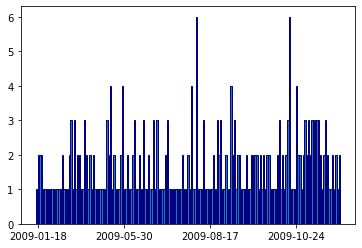

In [66]:

df['Date']=time_plot.astype(str) #convert to string
df['Date']=df['Date'].str.split(" ",expand=True)
b=df.sort_values(by=['Date'])
count=pd.Series([1 for i in range(len(time_plot))])
count.name='Count'
b=pd.concat([b,count],axis=1)
b=b['Count'].groupby(b['Date'])
b_sum=pd.Series(b.sum())
#sns.distplot(b_sum,kde=False) # frequency of earthquakes per count
b_sum_index=b_sum.index.values
plt.bar(b_sum_index,b_sum,edgecolor='navy')
plt.xticks(np.arange(1,len(b_sum_index), 50))

In [72]:
b_sum.mean()
timedelta

1.6779661016949152